In [ ]:
import sklearn
import numpy as np
from sklearn.datasets import load_diabetes

In [ ]:
#Check out dataset
diabetes = load_diabetes()
print(diabetes.data.shape)
print(diabetes.target.shape)

(442, 10)
(442,)


# Problem 1B

In [ ]:
# Save the data
X = diabetes.data
X_transpose = X.T
y = diabetes.target



# Closed form solution
X_transpose_X = np.dot(X_transpose, X) # https://numpy.org/doc/stable/reference/generated/numpy.dot.html
X_transpose_X_inv = np.linalg.inv(X_transpose_X) # https://numpy.org/doc/stable/reference/routines.linalg.html
X_transpose_y = np.dot(X_transpose, y)
w_star = np.dot(X_transpose_X_inv, X_transpose_y)

# Problem 1C

In [ ]:
# Linear solver
from sklearn.linear_model import LinearRegression



# Load data and fit to model, extract w_star: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target
regressionModel = LinearRegression()
regressionModel.fit(X, y)
w_star_solver = regressionModel.coef_

# Sanity Check

In [ ]:
# https://stackoverflow.com/questions/10580676/comparing-two-numpy-arrays-for-equality-element-wise
assert np.allclose(w_star, w_star_solver), "Numpy arrays are not close elementwise to one another"

In [ ]:
# Closed form
print("My solution: ")
print(w_star)

# Sklearn solver
print("\nSklearn: ")
print(w_star_solver)

My solution: 
[ -10.0098663  -239.81564367  519.84592005  324.3846455  -792.17563855
  476.73902101  101.04326794  177.06323767  751.27369956   67.62669218]

Sklearn: 
[ -10.0098663  -239.81564367  519.84592005  324.3846455  -792.17563855
  476.73902101  101.04326794  177.06323767  751.27369956   67.62669218]



---



# Problem 2C

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_wine
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load dataset
X, y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit our model
model = LogisticRegression()
model.fit(X_train, y_train)

c:\Users\liemj\anaconda3\envs\ASLenv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_true = y_test
y_pred = model.predict(X_test)

print("Model coef: ")
print(model.coef_)

print("\nGround truth: ")
print(y_true)

print("\nPredicted")
print(y_pred)

Model coef: 
[[-1.71720584e-02  1.49617205e-01  1.25232870e-01 -2.25825380e-01
  -3.19189734e-02  1.80023530e-01  4.02454060e-01 -1.80556348e-02
   7.23346435e-02 -2.19815151e-02  1.60663612e-02  3.03674641e-01
   7.74886272e-03]
 [ 3.97803158e-01 -5.70976516e-01 -1.05541699e-01  1.42490944e-01
   1.56126453e-02  2.92111209e-01  4.43766844e-01  3.16179559e-02
   3.16850041e-01 -1.10306732e+00  2.17536302e-01  4.11674292e-01
  -8.07889407e-03]
 [-3.80631099e-01  4.21359311e-01 -1.96911709e-02  8.33344361e-02
   1.63063281e-02 -4.72134739e-01 -8.46220904e-01 -1.35623212e-02
  -3.89184685e-01  1.12504884e+00 -2.33602663e-01 -7.15348933e-01
   3.30031346e-04]]

Ground truth: 
[0 1 2 2 2 1 1 1 1 2 2 1 1 1 0 1 1 1 0 0 1 2 1 1 1 1 2 1 0 2 0 2 2 2 0 2]

Predicted
[0 1 2 2 2 1 1 1 1 2 2 1 1 1 0 1 1 1 0 0 1 2 1 1 1 1 2 1 0 2 0 2 2 2 0 2]


# Problem 3A

In [ ]:
import torchvision
import torch
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset

# Download and load the data
data = torchvision.datasets.FashionMNIST('./FashionMNIST', train=True, download=True, transform=torchvision.transforms.ToTensor())

In [ ]:
sample_img, sample_lbl = data[0]
print(sample_img.shape)
print(sample_lbl)

torch.Size([1, 28, 28])
9


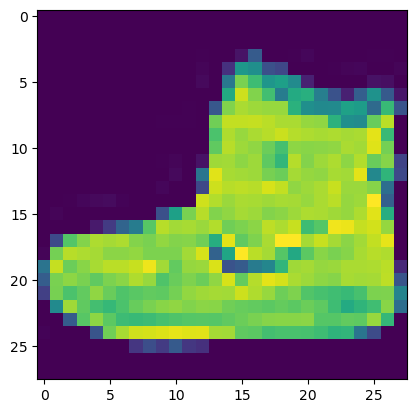

In [ ]:
plt.imshow(sample_img.squeeze())

In [ ]:
train_length = int(0.8 * len(data))
test_length = int(0.2 * len(data))

# Prepare into dataloader
train_dataset, test_dataset = torch.utils.data.random_split(data, (train_length, test_length))
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32)

# Problem 3B

In [ ]:
from torch.nn import Module
from torch.nn import CrossEntropyLoss
from torch.optim import SGD
from torch.nn import Linear
from torch.nn import ReLU
from torch.nn import Sequential
from tqdm import tqdm

In [ ]:
class JosefNet(Module):
  def __init__(self, inshape=(28, 28), num_classes=10):
    super(JosefNet, self).__init__()
    self.inshape = inshape

    input_size = self.inshape[0] * self.inshape[1]

    self.layer1 = self.JosefLayer(input_size, input_size + 10)
    self.layer2 = self.JosefLayer(input_size + 10, input_size + 20)
    self.layer3 = self.JosefLayer(input_size + 20, input_size + 10)
    self.layer4 = Linear(input_size + 10, num_classes)

  def JosefLayer(self, in_channels, out_channels):
    layer = Sequential(
        Linear(in_channels, out_channels),
        ReLU(),
    )
    return layer

  def forward(self, x):
    x = x.view(-1, self.inshape[0] * self.inshape[1])
    x = self.layer1(x)
    x = self.layer2(x)
    x = self.layer3(x)
    x = self.layer4(x)
    return x

# 1. Model 2. Loss 3. Optimization
model = JosefNet(inshape=(28, 28), num_classes=10)
criterion = CrossEntropyLoss()
optimizer = SGD(model.parameters(), lr=0.01)

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using {device}...')

model = model.to(device)

Using cpu...


In [ ]:
n_epochs = 10
train_losses = []
test_losses = []

for epoch in range(n_epochs):
  train_loss = 0
  test_loss = 0

  model.train()
  for imgs, lbls in tqdm(train_loader, desc=f"Epoch {epoch+1}/{n_epochs} - Training"):
    imgs = imgs.to(device)
    lbls = lbls.to(device)

    # get prediction and calculate training loss on batch
    preds = model(imgs)
    loss = criterion(preds, lbls)
    loss.backward() # Backward pass
    optimizer.step() # Gradient update
    optimizer.zero_grad() # Zero gradient for next run

    train_loss += loss.item()

  # calculate the loss
  train_loss /= len(train_loader)
  train_losses.append(train_loss)

  model.eval()
  with torch.no_grad():
    # do the same on test data each epoch
    for imgs, lbls in tqdm(test_loader, desc=f"Epoch {epoch+1}/{n_epochs} - Testing"):
      imgs = imgs.to(device)
      lbls = lbls.to(device)

      # get preds and calculate batchwise loss
      preds = model(imgs)
      loss = criterion(preds, lbls)

      test_loss += loss.item()

    # Calculate test loss
    test_loss /= len(test_loader)
    test_losses.append(test_loss)

  print(f'Training Loss: {train_loss} \t Test Loss: {test_loss}')

Epoch 1/10 - Testing: 100%|██████████| 375/375 [00:01<00:00, 199.58it/s]


Training Loss: 1.2783720241983731 	 Test Loss: 0.7180028606255849


Epoch 2/10 - Testing: 100%|██████████| 375/375 [00:01<00:00, 202.13it/s]


Training Loss: 0.6391100450754166 	 Test Loss: 0.5531621694564819


Epoch 3/10 - Testing: 100%|██████████| 375/375 [00:01<00:00, 202.75it/s]


Training Loss: 0.535347327152888 	 Test Loss: 0.5120111543337504


Epoch 4/10 - Testing: 100%|██████████| 375/375 [00:01<00:00, 206.03it/s]


Training Loss: 0.4817542056838671 	 Test Loss: 0.48389638829231263


Epoch 5/10 - Testing: 100%|██████████| 375/375 [00:02<00:00, 185.58it/s]


Training Loss: 0.4507949015696843 	 Test Loss: 0.4513076793750127


Epoch 6/10 - Testing: 100%|██████████| 375/375 [00:01<00:00, 199.35it/s]


Training Loss: 0.4271812918086847 	 Test Loss: 0.4186215761701266


Epoch 7/10 - Testing: 100%|██████████| 375/375 [00:01<00:00, 201.48it/s]


Training Loss: 0.40905945078035194 	 Test Loss: 0.398398036022981


Epoch 8/10 - Testing: 100%|██████████| 375/375 [00:01<00:00, 200.26it/s]


Training Loss: 0.39271588702499866 	 Test Loss: 0.3925811664263407


Epoch 9/10 - Testing: 100%|██████████| 375/375 [00:01<00:00, 202.14it/s]


Training Loss: 0.3788658427745104 	 Test Loss: 0.37457411682605746


Epoch 10/10 - Testing: 100%|██████████| 375/375 [00:01<00:00, 204.16it/s]

Training Loss: 0.3653795603265365 	 Test Loss: 0.37344550824165346


# Problem 3C

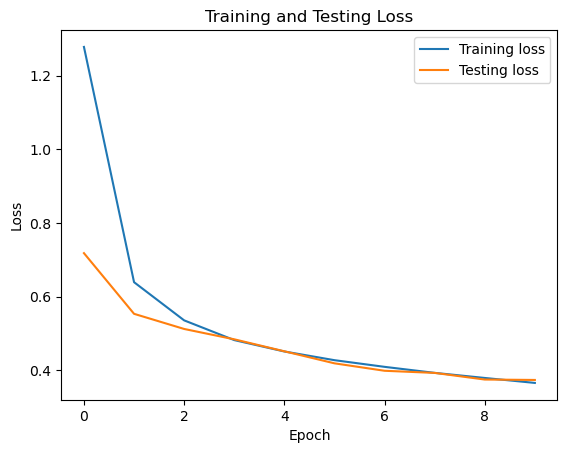

In [ ]:
#plot the losses
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Testing loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Testing Loss')
plt.legend()
plt.show()

Predicted: 8 	 Ground Truth: 8


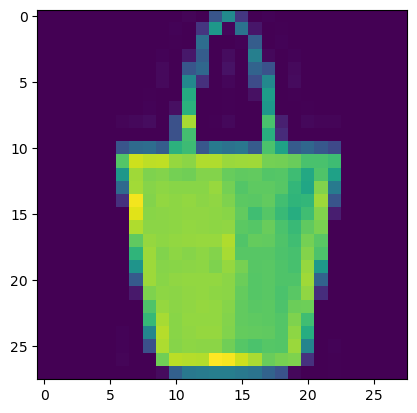

In [ ]:
# sample prediction
model.eval()
sample_img, sample_lbl = test_dataset[1]
sample_img = sample_img.to(device)

with torch.no_grad():
    sample_pred = model(sample_img.unsqueeze(0))
    sample_pred = torch.argmax(sample_pred, dim=1)

print(f'Predicted: {sample_pred.item()} \t Ground Truth: {sample_lbl}')
plt.imshow(sample_img.squeeze().cpu().numpy())

In [ ]:
# accuracy
correct = 0
total = 0
model.eval()

with torch.no_grad():
    for imgs, lbls in test_loader:
        imgs = imgs.to(device)
        lbls = lbls.to(device)

        preds = model(imgs)
        preds = torch.argmax(preds, dim=1)

        total += lbls.size(0)
        correct += (preds == lbls).sum().item()

print(f'Accuracy: {correct/total * 100}%')

Accuracy: 86.90833333333333%


Training loss and testing losss are relatively comparable in my training process, thus it seems like it isn't really over or underfitting. That said, an accuracy of 87% can be improved some more. Tweaking with the number of channels and observing consequent performance indicates it is likely a problem of too large a number of parameters for a rather simple dataset.

# Problem 4A

In [ ]:
import torchvision
import torch
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset
from torch.nn import Module
from torch.nn import CrossEntropyLoss
from torch.optim import SGD
from torch.nn import Linear
from torch.nn import ReLU
from torch.nn import Sequential
from tqdm import tqdm
import numpy as np

In [ ]:
class JosefNet(Module):
  def __init__(self, inshape=(28, 28), num_classes=10):
    super(JosefNet, self).__init__()
    self.inshape = inshape

    input_size = self.inshape[0] * self.inshape[1]

    self.layer1 = self.JosefLayer(input_size, input_size + 24)
    self.layer2 = self.JosefLayer(input_size + 24, input_size + 16)
    self.layer3 = Linear(input_size + 16, num_classes)

  def JosefLayer(self, in_channels, out_channels):
    layer = Sequential(
        Linear(in_channels, out_channels),
        ReLU(),
    )
    return layer

  def forward(self, x):
    x = x.view(-1, self.inshape[0] * self.inshape[1])
    x = self.layer1(x)
    x = self.layer2(x)
    x = self.layer3(x)
    return x

In [ ]:
# Download and load the data
data = torchvision.datasets.FashionMNIST('./FashionMNIST', train=True, download=True, transform=torchvision.transforms.ToTensor())

In [ ]:
train_length = int(0.8 * len(data))
test_length = int(0.2 * len(data))

# Prepare a subsample into dataloader
train_dataset, test_dataset = torch.utils.data.random_split(data, (train_length, test_length))

subsampled_train_dataset = torch.utils.data.Subset(train_dataset, range(25000))
sample_train_loader = DataLoader(subsampled_train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32)

In [ ]:
# What is the size of our subsample?
print(f"Shape of subsample training data: {len(sample_train_loader.dataset)}")

Shape of subsample training data: 25000


# Problem 4B

In [ ]:
def train_benchmarker(optimizer, model, n_epochs = 10):
  criterion = CrossEntropyLoss()

  # Move model to device
  device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
  model = model.to(device)

  # Track losses over epochs
  train_losses = []
  test_losses = []

  for epoch in range(n_epochs):
    train_loss = 0
    test_loss = 0

    model.train()
    for imgs, lbls in tqdm(sample_train_loader, desc=f"Epoch {epoch+1}/{n_epochs} Training"):
      imgs = imgs.to(device)
      lbls = lbls.to(device)

      # get prediction and calculate training loss on batch
      preds = model(imgs)
      loss = criterion(preds, lbls)
      loss.backward() # Backward pass
      optimizer.step() # Gradient update
      optimizer.zero_grad() # Zero gradient for next run

      train_loss += loss.item()

    # calculate the loss
    train_loss /= len(train_loader)
    train_losses.append(train_loss)

    model.eval()
    with torch.no_grad():
      # do the same on test data each epoch
      for imgs, lbls in tqdm(test_loader, desc=f"Epoch {epoch+1}/{n_epochs} Testing"):
        imgs = imgs.to(device)
        lbls = lbls.to(device)

        # get preds and calculate batchwise loss
        preds = model(imgs)
        loss = criterion(preds, lbls)

        test_loss += loss.item()

      # Calculate test loss
      test_loss /= len(test_loader)
      test_losses.append(test_loss)

    print(f'Training Loss: {train_loss} \t Test Loss: {test_loss}')
  return (train_losses, test_losses)

# Problem 4C

In [ ]:
# SGD optim
n_epochs = 10
SGD_test_losses = []

for i in range(5):
  model = JosefNet(inshape=(28, 28), num_classes=10)
  optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
  _, SGD_test_loss = train_benchmarker(optimizer, model, n_epochs=n_epochs)
  SGD_test_losses.append(SGD_test_loss)

Epoch 1/10 - Testing: 100%|██████████| 375/375 [00:03<00:00, 99.77it/s] 


Training Loss: 0.7032558952569962 	 Test Loss: 0.831922208627065


Epoch 2/10 - Testing: 100%|██████████| 375/375 [00:03<00:00, 109.46it/s]


Training Loss: 0.37139680455128354 	 Test Loss: 0.6688712609608968


Epoch 3/10 - Testing: 100%|██████████| 375/375 [00:02<00:00, 129.51it/s]


Training Loss: 0.31033075039585434 	 Test Loss: 0.5940519489447276


Epoch 4/10 - Testing: 100%|██████████| 375/375 [00:02<00:00, 143.34it/s]


Training Loss: 0.2793977247873942 	 Test Loss: 0.5527418589989345


Epoch 5/10 - Testing: 100%|██████████| 375/375 [00:03<00:00, 101.18it/s]


Training Loss: 0.26157282172640167 	 Test Loss: 0.5326344661315282


Epoch 6/10 - Testing: 100%|██████████| 375/375 [00:02<00:00, 146.66it/s]


Training Loss: 0.25076081553101537 	 Test Loss: 0.7300801517963409


Epoch 7/10 - Testing: 100%|██████████| 375/375 [00:02<00:00, 143.53it/s]


Training Loss: 0.24109366881847383 	 Test Loss: 0.47055828726291654


Epoch 8/10 - Testing: 100%|██████████| 375/375 [00:02<00:00, 142.41it/s]


Training Loss: 0.23380770835777123 	 Test Loss: 0.4714628564119339


Epoch 9/10 - Testing: 100%|██████████| 375/375 [00:06<00:00, 59.97it/s]


Training Loss: 0.22798324532806874 	 Test Loss: 0.4753555623690287


Epoch 10/10 - Testing: 100%|██████████| 375/375 [00:02<00:00, 147.33it/s]


Training Loss: 0.22110255692402522 	 Test Loss: 0.4397340894540151


Epoch 1/10 - Testing: 100%|██████████| 375/375 [00:02<00:00, 146.47it/s]


Training Loss: 0.6973802994092305 	 Test Loss: 0.8319458848635356


Epoch 2/10 - Testing: 100%|██████████| 375/375 [00:02<00:00, 147.89it/s]


Training Loss: 0.3716454725662867 	 Test Loss: 0.6832176003456115


Epoch 3/10 - Testing: 100%|██████████| 375/375 [00:02<00:00, 140.76it/s]


Training Loss: 0.3109091434677442 	 Test Loss: 0.6085583868821463


Epoch 4/10 - Testing: 100%|██████████| 375/375 [00:02<00:00, 148.03it/s]


Training Loss: 0.28075346156954767 	 Test Loss: 0.546166186650594


Epoch 5/10 - Testing: 100%|██████████| 375/375 [00:02<00:00, 146.58it/s]


Training Loss: 0.2622709200382233 	 Test Loss: 0.5189207652807236


Epoch 6/10 - Testing: 100%|██████████| 375/375 [00:02<00:00, 142.59it/s]


Training Loss: 0.2505895812511444 	 Test Loss: 0.5336777829726537


Epoch 7/10 - Testing: 100%|██████████| 375/375 [00:02<00:00, 145.33it/s]


Training Loss: 0.24124097428719202 	 Test Loss: 0.49520548661549885


Epoch 8/10 - Testing: 100%|██████████| 375/375 [00:02<00:00, 131.42it/s]


Training Loss: 0.23449389144281546 	 Test Loss: 0.4662925941546758


Epoch 9/10 - Testing: 100%|██████████| 375/375 [00:03<00:00, 109.09it/s]


Training Loss: 0.2284002882341544 	 Test Loss: 0.4803143405119578


Epoch 10/10 - Testing: 100%|██████████| 375/375 [00:03<00:00, 100.90it/s]


Training Loss: 0.22182567161818345 	 Test Loss: 0.47303507022062935


Epoch 1/10 - Testing: 100%|██████████| 375/375 [00:03<00:00, 106.01it/s]


Training Loss: 0.7029864028294881 	 Test Loss: 0.8482988316218059


Epoch 2/10 - Testing: 100%|██████████| 375/375 [00:02<00:00, 126.31it/s]


Training Loss: 0.3720394649704297 	 Test Loss: 0.6653388329346974


Epoch 3/10 - Testing: 100%|██████████| 375/375 [00:06<00:00, 55.97it/s]


Training Loss: 0.31079721003770827 	 Test Loss: 0.572528049548467


Epoch 4/10 - Testing: 100%|██████████| 375/375 [00:04<00:00, 84.82it/s]


Training Loss: 0.28133816734949746 	 Test Loss: 0.5281148660580317


Epoch 5/10 - Testing: 100%|██████████| 375/375 [00:02<00:00, 132.47it/s]


Training Loss: 0.2637672201494376 	 Test Loss: 0.49779581745465595


Epoch 6/10 - Testing: 100%|██████████| 375/375 [00:02<00:00, 145.21it/s]


Training Loss: 0.2510458189547062 	 Test Loss: 0.5084331505298615


Epoch 7/10 - Testing: 100%|██████████| 375/375 [00:02<00:00, 143.69it/s]


Training Loss: 0.2430949932038784 	 Test Loss: 0.5103988656600317


Epoch 8/10 - Testing: 100%|██████████| 375/375 [00:02<00:00, 146.13it/s]


Training Loss: 0.2351061847358942 	 Test Loss: 0.47062710213661196


Epoch 9/10 - Testing: 100%|██████████| 375/375 [00:02<00:00, 142.40it/s]


Training Loss: 0.22949841050306957 	 Test Loss: 0.45258520857493084


Epoch 10/10 - Testing: 100%|██████████| 375/375 [00:02<00:00, 145.74it/s]


Training Loss: 0.2231858485241731 	 Test Loss: 0.6304187218348185


Epoch 1/10 - Testing: 100%|██████████| 375/375 [00:02<00:00, 140.72it/s]


Training Loss: 0.6973215272426605 	 Test Loss: 0.859248434861501


Epoch 2/10 - Testing: 100%|██████████| 375/375 [00:02<00:00, 140.04it/s]


Training Loss: 0.37142108802000684 	 Test Loss: 0.6882520846525828


Epoch 3/10 - Testing: 100%|██████████| 375/375 [00:02<00:00, 133.96it/s]


Training Loss: 0.31137232331434883 	 Test Loss: 0.6704572249253591


Epoch 4/10 - Testing: 100%|██████████| 375/375 [00:03<00:00, 117.12it/s]


Training Loss: 0.28058403914173446 	 Test Loss: 0.5357349493106206


Epoch 5/10 - Testing: 100%|██████████| 375/375 [00:03<00:00, 107.23it/s]


Training Loss: 0.26392582871516546 	 Test Loss: 0.5313036245107651


Epoch 6/10 - Testing: 100%|██████████| 375/375 [00:03<00:00, 105.74it/s]


Training Loss: 0.25115848632653553 	 Test Loss: 0.5582472852468491


Epoch 7/10 - Testing: 100%|██████████| 375/375 [00:03<00:00, 122.66it/s]


Training Loss: 0.24165315576891105 	 Test Loss: 0.4687000723282496


Epoch 8/10 - Testing: 100%|██████████| 375/375 [00:02<00:00, 147.33it/s]


Training Loss: 0.23342797333498796 	 Test Loss: 0.4865286138852437


Epoch 9/10 - Testing: 100%|██████████| 375/375 [00:02<00:00, 144.88it/s]


Training Loss: 0.22699206382036208 	 Test Loss: 0.4775100172758102


Epoch 10/10 - Testing: 100%|██████████| 375/375 [00:02<00:00, 146.96it/s]


Training Loss: 0.2213768932123979 	 Test Loss: 0.483452863574028


Epoch 1/10 - Testing: 100%|██████████| 375/375 [00:02<00:00, 147.83it/s]


Training Loss: 0.6902742880185445 	 Test Loss: 0.8305537432034811


Epoch 2/10 - Testing: 100%|██████████| 375/375 [00:02<00:00, 146.59it/s]


Training Loss: 0.3685743841131528 	 Test Loss: 0.6594934310913086


Epoch 3/10 - Testing: 100%|██████████| 375/375 [00:02<00:00, 146.03it/s]


Training Loss: 0.3096422956089179 	 Test Loss: 0.5743531687259674


Epoch 4/10 - Testing: 100%|██████████| 375/375 [00:03<00:00, 107.97it/s]


Training Loss: 0.2811964892645677 	 Test Loss: 0.5364169315099716


Epoch 5/10 - Testing: 100%|██████████| 375/375 [00:03<00:00, 97.91it/s] 


Training Loss: 0.2632191900511583 	 Test Loss: 0.5455556256771088


Epoch 6/10 - Testing: 100%|██████████| 375/375 [00:03<00:00, 120.01it/s]


Training Loss: 0.25132071433464687 	 Test Loss: 0.49179240469137825


Epoch 7/10 - Testing: 100%|██████████| 375/375 [00:02<00:00, 140.96it/s]


Training Loss: 0.2427383978466193 	 Test Loss: 0.49242932720979055


Epoch 8/10 - Testing: 100%|██████████| 375/375 [00:02<00:00, 148.17it/s]


Training Loss: 0.23422922939062119 	 Test Loss: 0.46829562246799467


Epoch 9/10 - Testing: 100%|██████████| 375/375 [00:02<00:00, 144.48it/s]


Training Loss: 0.22837601993481318 	 Test Loss: 0.4565233874320984


Epoch 10/10 - Testing: 100%|██████████| 375/375 [00:02<00:00, 145.13it/s]

Training Loss: 0.2224973182529211 	 Test Loss: 0.44923461850484214


In [ ]:
# Calculate average test losses
average_SGD_test_losses = np.mean(SGD_test_losses, axis=0)

In [ ]:
# Adam optim
n_epochs = 10
Adam_test_losses = []

for i in range(5):
  model = JosefNet(inshape=(28, 28), num_classes=10)
  optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
  _, Adam_test_loss = train_benchmarker(optimizer, model, n_epochs=n_epochs)
  Adam_test_losses.append(Adam_test_loss)

Epoch 1/10 - Testing: 100%|██████████| 375/375 [00:02<00:00, 146.09it/s]


Training Loss: 0.3654317532678445 	 Test Loss: 0.5833315773407618


Epoch 2/10 - Testing: 100%|██████████| 375/375 [00:02<00:00, 149.77it/s]


Training Loss: 0.2740085094968478 	 Test Loss: 0.5875008088747661


Epoch 3/10 - Testing: 100%|██████████| 375/375 [00:03<00:00, 100.81it/s]


Training Loss: 0.2522111942370733 	 Test Loss: 0.5394477671980857


Epoch 4/10 - Testing: 100%|██████████| 375/375 [00:02<00:00, 147.88it/s]


Training Loss: 0.2433232283492883 	 Test Loss: 0.4746378060976664


Epoch 5/10 - Testing: 100%|██████████| 375/375 [00:03<00:00, 113.25it/s]


Training Loss: 0.23466990700364113 	 Test Loss: 0.4549342578252157


Epoch 6/10 - Testing: 100%|██████████| 375/375 [00:02<00:00, 146.49it/s]


Training Loss: 0.22887196751435598 	 Test Loss: 0.5085959331393242


Epoch 7/10 - Testing: 100%|██████████| 375/375 [00:02<00:00, 138.83it/s]


Training Loss: 0.22271690527598062 	 Test Loss: 0.48208165415128074


Epoch 8/10 - Testing: 100%|██████████| 375/375 [00:02<00:00, 149.25it/s]


Training Loss: 0.21972410608517626 	 Test Loss: 0.5561249463160832


Epoch 9/10 - Testing: 100%|██████████| 375/375 [00:03<00:00, 119.65it/s]


Training Loss: 0.2151648937612772 	 Test Loss: 0.4512778393427531


Epoch 10/10 - Testing: 100%|██████████| 375/375 [00:03<00:00, 100.71it/s]


Training Loss: 0.2123339739938577 	 Test Loss: 0.46494236395756405


Epoch 1/10 - Testing: 100%|██████████| 375/375 [00:02<00:00, 144.79it/s]


Training Loss: 0.3539737274547418 	 Test Loss: 0.5288344578742981


Epoch 2/10 - Testing: 100%|██████████| 375/375 [00:02<00:00, 145.53it/s]


Training Loss: 0.264236765747269 	 Test Loss: 0.5591109616557757


Epoch 3/10 - Testing: 100%|██████████| 375/375 [00:02<00:00, 144.38it/s]


Training Loss: 0.25424682000279425 	 Test Loss: 0.5818981868028641


Epoch 4/10 - Testing: 100%|██████████| 375/375 [00:02<00:00, 146.92it/s]


Training Loss: 0.2363671946277221 	 Test Loss: 0.5115560232400894


Epoch 5/10 - Testing: 100%|██████████| 375/375 [00:03<00:00, 112.22it/s]


Training Loss: 0.22673394242922465 	 Test Loss: 0.46908511624733606


Epoch 6/10 - Testing: 100%|██████████| 375/375 [00:02<00:00, 150.18it/s]


Training Loss: 0.22332638053099316 	 Test Loss: 0.45198037900527316


Epoch 7/10 - Testing: 100%|██████████| 375/375 [00:02<00:00, 143.23it/s]


Training Loss: 0.21857802060246467 	 Test Loss: 0.45025641266504923


Epoch 8/10 - Testing: 100%|██████████| 375/375 [00:02<00:00, 147.16it/s]


Training Loss: 0.2143687479669849 	 Test Loss: 0.4996988552411397


Epoch 9/10 - Testing: 100%|██████████| 375/375 [00:02<00:00, 137.11it/s]


Training Loss: 0.2111202954252561 	 Test Loss: 0.49969469267129896


Epoch 10/10 - Testing: 100%|██████████| 375/375 [00:03<00:00, 119.21it/s]


Training Loss: 0.2302551020483176 	 Test Loss: 0.47922955787181853


Epoch 1/10 - Testing: 100%|██████████| 375/375 [00:02<00:00, 148.91it/s]


Training Loss: 0.35898554016153017 	 Test Loss: 0.601854331334432


Epoch 2/10 - Testing: 100%|██████████| 375/375 [00:02<00:00, 149.72it/s]


Training Loss: 0.27247007976472376 	 Test Loss: 0.542636224548022


Epoch 3/10 - Testing: 100%|██████████| 375/375 [00:02<00:00, 148.93it/s]


Training Loss: 0.25296323067943255 	 Test Loss: 0.4784342621962229


Epoch 4/10 - Testing: 100%|██████████| 375/375 [00:02<00:00, 151.98it/s]


Training Loss: 0.2385025696158409 	 Test Loss: 0.5019832393924395


Epoch 5/10 - Testing: 100%|██████████| 375/375 [00:03<00:00, 111.47it/s]


Training Loss: 0.23276634699602922 	 Test Loss: 0.4488249014218648


Epoch 6/10 - Testing: 100%|██████████| 375/375 [00:02<00:00, 144.03it/s]


Training Loss: 0.22475620307028293 	 Test Loss: 0.595899116118749


Epoch 7/10 - Testing: 100%|██████████| 375/375 [00:03<00:00, 110.79it/s]


Training Loss: 0.22245219213267167 	 Test Loss: 0.5178749318122864


Epoch 8/10 - Testing: 100%|██████████| 375/375 [00:02<00:00, 144.68it/s]


Training Loss: 0.21556083432336648 	 Test Loss: 0.49913416894276935


Epoch 9/10 - Testing: 100%|██████████| 375/375 [00:02<00:00, 144.52it/s]


Training Loss: 0.20958650760104258 	 Test Loss: 0.4604036008119583


Epoch 10/10 - Testing: 100%|██████████| 375/375 [00:02<00:00, 134.46it/s]


Training Loss: 0.2187787623355786 	 Test Loss: 0.4820935239394506


Epoch 1/10 - Testing: 100%|██████████| 375/375 [00:03<00:00, 102.28it/s]


Training Loss: 0.3659853796760241 	 Test Loss: 0.5479788842598597


Epoch 2/10 - Testing: 100%|██████████| 375/375 [00:02<00:00, 144.16it/s]


Training Loss: 0.2675914478003979 	 Test Loss: 0.6193021732568741


Epoch 3/10 - Testing: 100%|██████████| 375/375 [00:02<00:00, 144.31it/s]


Training Loss: 0.24650632084409396 	 Test Loss: 0.7361910355488459


Epoch 4/10 - Testing: 100%|██████████| 375/375 [00:02<00:00, 147.27it/s]


Training Loss: 0.2466878478229046 	 Test Loss: 0.4815908111135165


Epoch 5/10 - Testing: 100%|██████████| 375/375 [00:02<00:00, 148.92it/s]


Training Loss: 0.22869709129134813 	 Test Loss: 0.49099840025107067


Epoch 6/10 - Testing: 100%|██████████| 375/375 [00:02<00:00, 148.39it/s]


Training Loss: 0.21918948619067669 	 Test Loss: 0.4855769739548365


Epoch 7/10 - Testing: 100%|██████████| 375/375 [00:02<00:00, 125.92it/s]


Training Loss: 0.21414448607961337 	 Test Loss: 0.49175359867016477


Epoch 8/10 - Testing: 100%|██████████| 375/375 [00:02<00:00, 146.91it/s]


Training Loss: 0.21202878732979297 	 Test Loss: 0.4798419323563576


Epoch 9/10 - Testing: 100%|██████████| 375/375 [00:03<00:00, 105.65it/s]


Training Loss: 0.21019598935047784 	 Test Loss: 0.46873043829202654


Epoch 10/10 - Testing: 100%|██████████| 375/375 [00:02<00:00, 144.33it/s]


Training Loss: 0.2163353817462921 	 Test Loss: 0.48741906056801476


Epoch 1/10 - Testing: 100%|██████████| 375/375 [00:02<00:00, 128.09it/s]


Training Loss: 0.36483037168780963 	 Test Loss: 0.5417463071346283


Epoch 2/10 - Testing: 100%|██████████| 375/375 [00:02<00:00, 148.17it/s]


Training Loss: 0.2765614482363065 	 Test Loss: 0.5135874580542247


Epoch 3/10 - Testing: 100%|██████████| 375/375 [00:02<00:00, 143.70it/s]


Training Loss: 0.25574283040563267 	 Test Loss: 0.5408303540150324


Epoch 4/10 - Testing: 100%|██████████| 375/375 [00:02<00:00, 147.13it/s]


Training Loss: 0.24624789971113206 	 Test Loss: 0.5020753742059072


Epoch 5/10 - Testing: 100%|██████████| 375/375 [00:02<00:00, 151.73it/s]


Training Loss: 0.23750571478903293 	 Test Loss: 0.48759146718184154


Epoch 6/10 - Testing: 100%|██████████| 375/375 [00:02<00:00, 148.17it/s]


Training Loss: 0.23083959203461807 	 Test Loss: 0.46708949728806815


Epoch 7/10 - Testing: 100%|██████████| 375/375 [00:02<00:00, 145.51it/s]


Training Loss: 0.22450449765225253 	 Test Loss: 0.490779957652092


Epoch 8/10 - Testing: 100%|██████████| 375/375 [00:02<00:00, 144.72it/s]


Training Loss: 0.2216681248396635 	 Test Loss: 0.4642213821808497


Epoch 9/10 - Testing: 100%|██████████| 375/375 [00:02<00:00, 148.89it/s]


Training Loss: 0.22076052325963974 	 Test Loss: 0.5707468854983647


Epoch 10/10 - Testing: 100%|██████████| 375/375 [00:02<00:00, 134.70it/s]

Training Loss: 0.2116421319829921 	 Test Loss: 0.46040644123156865


In [ ]:
# Calculate average test losses
average_Adam_test_losses = np.mean(Adam_test_losses, axis=0)

In [ ]:
# Adam optim
n_epochs = 10
RMS_test_losses = []

for i in range(5):
  model = JosefNet(inshape=(28, 28), num_classes=10)
  optimizer = torch.optim.RMSprop(model.parameters(), lr=0.01)
  _, RMS_test_loss = train_benchmarker(optimizer, model, n_epochs=n_epochs)
  RMS_test_losses.append(RMS_test_loss)

Epoch 1/10 - Testing: 100%|██████████| 375/375 [00:04<00:00, 82.12it/s]


Training Loss: 6.0310569294095036 	 Test Loss: 1.0862604602177939


Epoch 2/10 - Testing: 100%|██████████| 375/375 [00:02<00:00, 147.64it/s]


Training Loss: 0.32885370299220085 	 Test Loss: 0.638817725499471


Epoch 3/10 - Testing: 100%|██████████| 375/375 [00:02<00:00, 151.32it/s]


Training Loss: 0.3203580447137356 	 Test Loss: 0.7279091687599818


Epoch 4/10 - Testing: 100%|██████████| 375/375 [00:02<00:00, 134.41it/s]


Training Loss: 0.28666069702307384 	 Test Loss: 0.5081834407250087


Epoch 5/10 - Testing: 100%|██████████| 375/375 [00:02<00:00, 139.11it/s]


Training Loss: 0.2908687073191007 	 Test Loss: 0.5410965729355812


Epoch 6/10 - Testing: 100%|██████████| 375/375 [00:02<00:00, 133.32it/s]


Training Loss: 0.2592891146739324 	 Test Loss: 0.7584362096389134


Epoch 7/10 - Testing: 100%|██████████| 375/375 [00:03<00:00, 111.96it/s]


Training Loss: 0.261046594619751 	 Test Loss: 0.5853155111074447


Epoch 8/10 - Testing: 100%|██████████| 375/375 [00:02<00:00, 146.78it/s]


Training Loss: 0.24715049920479457 	 Test Loss: 0.5599665404160817


Epoch 9/10 - Testing: 100%|██████████| 375/375 [00:02<00:00, 146.32it/s]


Training Loss: 0.24380170801778633 	 Test Loss: 0.6127594531774521


Epoch 10/10 - Testing: 100%|██████████| 375/375 [00:03<00:00, 112.58it/s]


Training Loss: 0.24343526390691597 	 Test Loss: 0.5536892920335134


Epoch 1/10 - Testing: 100%|██████████| 375/375 [00:02<00:00, 145.04it/s]


Training Loss: 7.513359728912512 	 Test Loss: 0.8332005533377329


Epoch 2/10 - Testing: 100%|██████████| 375/375 [00:02<00:00, 134.28it/s]


Training Loss: 0.31652966092526913 	 Test Loss: 0.558867587685585


Epoch 3/10 - Testing: 100%|██████████| 375/375 [00:03<00:00, 97.88it/s] 


Training Loss: 0.29831703410545984 	 Test Loss: 0.6096216421524684


Epoch 4/10 - Testing: 100%|██████████| 375/375 [00:02<00:00, 143.51it/s]


Training Loss: 0.28196839260061585 	 Test Loss: 1.0332829486529032


Epoch 5/10 - Testing: 100%|██████████| 375/375 [00:02<00:00, 143.02it/s]


Training Loss: 0.26977276037136716 	 Test Loss: 0.5470475015640259


Epoch 6/10 - Testing: 100%|██████████| 375/375 [00:02<00:00, 147.05it/s]


Training Loss: 0.2504699350496133 	 Test Loss: 0.7433851128021876


Epoch 7/10 - Testing: 100%|██████████| 375/375 [00:02<00:00, 147.46it/s]


Training Loss: 0.2425496401190758 	 Test Loss: 0.5163637398680051


Epoch 8/10 - Testing: 100%|██████████| 375/375 [00:02<00:00, 140.60it/s]


Training Loss: 0.2396071978956461 	 Test Loss: 0.5404832536180814


Epoch 9/10 - Testing: 100%|██████████| 375/375 [00:03<00:00, 104.28it/s]


Training Loss: 0.23758097997307778 	 Test Loss: 0.5571495739618937


Epoch 10/10 - Testing: 100%|██████████| 375/375 [00:02<00:00, 149.11it/s]


Training Loss: 0.23382302298645177 	 Test Loss: 1.7563684943119684


Epoch 1/10 - Testing: 100%|██████████| 375/375 [00:02<00:00, 144.31it/s]


Training Loss: 5.059769218325615 	 Test Loss: 0.8130136904716492


Epoch 2/10 - Testing: 100%|██████████| 375/375 [00:03<00:00, 108.12it/s]


Training Loss: 0.38942385417222974 	 Test Loss: 0.828550454735756


Epoch 3/10 - Testing: 100%|██████████| 375/375 [00:02<00:00, 144.08it/s]


Training Loss: 0.39429609855016073 	 Test Loss: 0.6359365843931833


Epoch 4/10 - Testing: 100%|██████████| 375/375 [00:02<00:00, 148.14it/s]


Training Loss: 0.3251425269941489 	 Test Loss: 0.7115254343350729


Epoch 5/10 - Testing: 100%|██████████| 375/375 [00:03<00:00, 100.79it/s]


Training Loss: 0.29494165566563607 	 Test Loss: 0.8718026615778605


Epoch 6/10 - Testing: 100%|██████████| 375/375 [00:02<00:00, 147.62it/s]


Training Loss: 0.28358923706412315 	 Test Loss: 0.5852385183970134


Epoch 7/10 - Testing: 100%|██████████| 375/375 [00:02<00:00, 145.23it/s]


Training Loss: 0.27935892542203267 	 Test Loss: 0.5847567280133565


Epoch 8/10 - Testing: 100%|██████████| 375/375 [00:03<00:00, 107.80it/s]


Training Loss: 0.2722424626549085 	 Test Loss: 0.6611277210712433


Epoch 9/10 - Testing: 100%|██████████| 375/375 [00:02<00:00, 143.12it/s]


Training Loss: 0.2703864302734534 	 Test Loss: 0.6017201855580012


Epoch 10/10 - Testing: 100%|██████████| 375/375 [00:02<00:00, 144.32it/s]


Training Loss: 0.2641073020597299 	 Test Loss: 0.6698999419609706


Epoch 1/10 - Testing: 100%|██████████| 375/375 [00:03<00:00, 97.23it/s] 


Training Loss: 3.16783631447951 	 Test Loss: 0.6961359899044037


Epoch 2/10 - Testing: 100%|██████████| 375/375 [00:02<00:00, 142.39it/s]


Training Loss: 0.32685648160551983 	 Test Loss: 0.6004725130796432


Epoch 3/10 - Testing: 100%|██████████| 375/375 [00:02<00:00, 143.30it/s]


Training Loss: 0.3055389421880245 	 Test Loss: 1.0797079923152924


Epoch 4/10 - Testing: 100%|██████████| 375/375 [00:04<00:00, 93.30it/s]


Training Loss: 0.32157494181394575 	 Test Loss: 0.8298569944699605


Epoch 5/10 - Testing: 100%|██████████| 375/375 [00:02<00:00, 142.55it/s]


Training Loss: 0.2914831153303385 	 Test Loss: 0.5993122043609619


Epoch 6/10 - Testing: 100%|██████████| 375/375 [00:03<00:00, 98.49it/s] 


Training Loss: 0.27585549017290273 	 Test Loss: 0.5378888872861862


Epoch 7/10 - Testing: 100%|██████████| 375/375 [00:02<00:00, 128.60it/s]


Training Loss: 0.2719623350203037 	 Test Loss: 0.5339740462700526


Epoch 8/10 - Testing: 100%|██████████| 375/375 [00:02<00:00, 137.03it/s]


Training Loss: 0.2664204407334328 	 Test Loss: 0.5773544978300731


Epoch 9/10 - Testing: 100%|██████████| 375/375 [00:03<00:00, 104.37it/s]


Training Loss: 0.2661888409157594 	 Test Loss: 0.5212955634991328


Epoch 10/10 - Testing: 100%|██████████| 375/375 [00:02<00:00, 137.36it/s]


Training Loss: 0.26102608639001845 	 Test Loss: 0.7628260831038157


Epoch 1/10 - Testing: 100%|██████████| 375/375 [00:02<00:00, 145.47it/s]


Training Loss: 5.822545525372028 	 Test Loss: 0.5917075935999553


Epoch 2/10 - Testing: 100%|██████████| 375/375 [00:03<00:00, 119.03it/s]


Training Loss: 0.29796630357205867 	 Test Loss: 0.5649822023510933


Epoch 3/10 - Testing: 100%|██████████| 375/375 [00:02<00:00, 143.43it/s]


Training Loss: 0.27856097034116584 	 Test Loss: 0.4943006470998128


Epoch 4/10 - Testing: 100%|██████████| 375/375 [00:03<00:00, 121.11it/s]


Training Loss: 0.27168866800765196 	 Test Loss: 0.512252598643303


Epoch 5/10 - Testing: 100%|██████████| 375/375 [00:02<00:00, 139.84it/s]


Training Loss: 0.2668871119270722 	 Test Loss: 0.5534438116550445


Epoch 6/10 - Testing: 100%|██████████| 375/375 [00:03<00:00, 94.86it/s]


Training Loss: 0.24255538199841975 	 Test Loss: 0.5044092157681783


Epoch 7/10 - Testing: 100%|██████████| 375/375 [00:03<00:00, 120.91it/s]


Training Loss: 0.23655242166419824 	 Test Loss: 0.6205205432573955


Epoch 8/10 - Testing: 100%|██████████| 375/375 [00:02<00:00, 138.64it/s]


Training Loss: 0.23216824392974378 	 Test Loss: 0.4737894734342893


Epoch 9/10 - Testing: 100%|██████████| 375/375 [00:03<00:00, 107.57it/s]


Training Loss: 0.23211938532193502 	 Test Loss: 0.5611137472391129


Epoch 10/10 - Testing: 100%|██████████| 375/375 [00:02<00:00, 140.28it/s]

Training Loss: 0.22849595892926058 	 Test Loss: 0.717674429277579


In [ ]:













# Calculate average test losses
average_RMS_test_losses = np.mean(RMS_test_losses, axis=0)

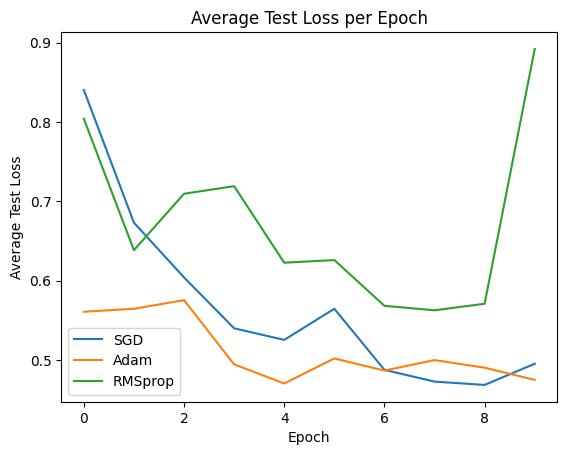

In [ ]:
plt.plot(average_SGD_test_losses, label='SGD')
plt.plot(average_Adam_test_losses, label='Adam')
plt.plot(average_RMS_test_losses, label='RMSprop')
plt.title('Average Test Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Average Test Loss')
plt.legend()
plt.show()